In [1]:
import pandas as pd
import numpy as np

In [2]:
learn = pd.read_csv('/content/drive/My Drive/HAX/summer project/learning_style_dataset.csv')
learn.head()

,student_id,Age,Gender,College_location,educational_designation,educational_stream,Place_grownup_in,school_region,school_Type,school_board,learning_style,V1,A1,R1,K1,V2,A2,R2,K2,style
0,1,0,1,22,1,4,0,0,2,2,Multi,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1
1,2,0,1,22,2,2,6,0,2,2,Multi,2.000000,1.666667,2.000000,2.333333,4.166667,3.500000,3.166667,3.500000,0
2,3,0,0,14,1,4,4,3,0,0,Multi,3.000000,3.666667,2.666667,3.000000,4.666667,3.833333,4.333333,4.000000,2
3,4,0,1,2,2,2,4,6,2,2,K,2.666667,3.000000,2.333333,3.000000,3.333333,3.666667,3.500000,3.833333,1
4,5,0,0,22,1,4,0,0,2,2,A,3.333333,3.000000,3.000000,3.000000,3.000000,3.166667,3.000000,3.000000,0


In [3]:
from sklearn import preprocessing
lf = preprocessing.LabelEncoder()
learn["learning_style"] = lf.fit_transform(learn["learning_style"])
learn.head()

,student_id,Age,Gender,College_location,educational_designation,educational_stream,Place_grownup_in,school_region,school_Type,school_board,learning_style,V1,A1,R1,K1,V2,A2,R2,K2,style
0,1,0,1,22,1,4,0,0,2,2,2,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1
1,2,0,1,22,2,2,6,0,2,2,2,2.000000,1.666667,2.000000,2.333333,4.166667,3.500000,3.166667,3.500000,0
2,3,0,0,14,1,4,4,3,0,0,2,3.000000,3.666667,2.666667,3.000000,4.666667,3.833333,4.333333,4.000000,2
3,4,0,1,2,2,2,4,6,2,2,1,2.666667,3.000000,2.333333,3.000000,3.333333,3.666667,3.500000,3.833333,1
4,5,0,0,22,1,4,0,0,2,2,0,3.333333,3.000000,3.000000,3.000000,3.000000,3.166667,3.000000,3.000000,0


In [4]:
learn.shape

(396, 20)

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from sklearn.metrics import confusion_matrix

In [6]:
X = learn.drop(['student_id','learning_style'],axis=1)
y = learn.pop('learning_style')

In [7]:
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.30, random_state=1, stratify=y)

In [9]:
y_tr = pd.get_dummies(y_train)
y_te = pd.get_dummies(y_test)

In [10]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics = METRICS):
  model = keras.Sequential([
      keras.layers.Dense(18, activation='relu',input_shape=(X_train.shape[-1],)),
      keras.layers.Dense(512, activation='relu'),
      keras.layers.Dense(18, activation='relu'),
      keras.layers.Dense(5, activation='softmax',),])

  model.compile(
      optimizer=keras.optimizers.SGD(lr=1e-3),
      loss=keras.losses.CategoricalCrossentropy(),
      metrics=metrics)

  return model

In [11]:
EPOCHS = 100
BATCH_SIZE = 1

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [12]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 18)                342       
_________________________________________________________________
dense_1 (Dense)              (None, 512)               9728      
_________________________________________________________________
dense_2 (Dense)              (None, 18)                9234      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 95        
Total params: 19,399
Trainable params: 19,399
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.predict(X_train[:10])

array([[0.17956257, 0.17712434, 0.20247799, 0.19108903, 0.24974601],
       [0.1929779 , 0.19667543, 0.18614745, 0.19474548, 0.22945376],
       [0.18931645, 0.16318305, 0.14630978, 0.22800353, 0.27318722],
       [0.17031902, 0.20566244, 0.15428308, 0.21333063, 0.25640485],
       [0.18847355, 0.18638173, 0.18783876, 0.20930722, 0.22799876],
       [0.16491316, 0.20281963, 0.15782142, 0.2044153 , 0.2700305 ],
       [0.18609804, 0.19025147, 0.17372668, 0.19793239, 0.25199148],
       [0.19899935, 0.17942736, 0.1570605 , 0.20238955, 0.26212323],
       [0.16438864, 0.20282641, 0.15975699, 0.20727998, 0.26574802],
       [0.19718684, 0.17920603, 0.18109082, 0.21521264, 0.22730371]],
      dtype=float32)

In [14]:
results = model.evaluate(X_train, y_tr, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.7288


In [15]:
model = make_model()
history = model.fit(
    X_train,
    y_tr,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(X_test,y_te))

Epoch 1/100
277/277 [==============================] - 1s 5ms/step - loss: 1.3729 - tp: 14.0000 - fp: 5.0000 - tn: 2211.0000 - fn: 540.0000 - accuracy: 0.8032 - precision: 0.7368 - recall: 0.0253 - auc: 0.5643 - val_loss: 1.2277 - val_tp: 26.0000 - val_fp: 9.0000 - val_tn: 467.0000 - val_fn: 93.0000 - val_accuracy: 0.8286 - val_precision: 0.7429 - val_recall: 0.2185 - val_auc: 0.8061
Epoch 2/100
277/277 [==============================] - 0s 2ms/step - loss: 1.1918 - tp: 99.0000 - fp: 56.0000 - tn: 1052.0000 - fn: 178.0000 - accuracy: 0.8310 - precision: 0.6387 - recall: 0.3574 - auc: 0.8058 - val_loss: 1.1673 - val_tp: 52.0000 - val_fp: 29.0000 - val_tn: 447.0000 - val_fn: 67.0000 - val_accuracy: 0.8387 - val_precision: 0.6420 - val_recall: 0.4370 - val_auc: 0.8147
Epoch 3/100
277/277 [==============================] - 0s 2ms/step - loss: 1.1591 - tp: 142.0000 - fp: 83.0000 - tn: 1025.0000 - fn: 135.0000 - accuracy: 0.8426 - precision: 0.6311 - recall: 0.5126 - auc: 0.8147 - val_loss: 

In [16]:
def plot_metrics(history):
  metrics =  ['auc', 'precision', 'recall','accuracy']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

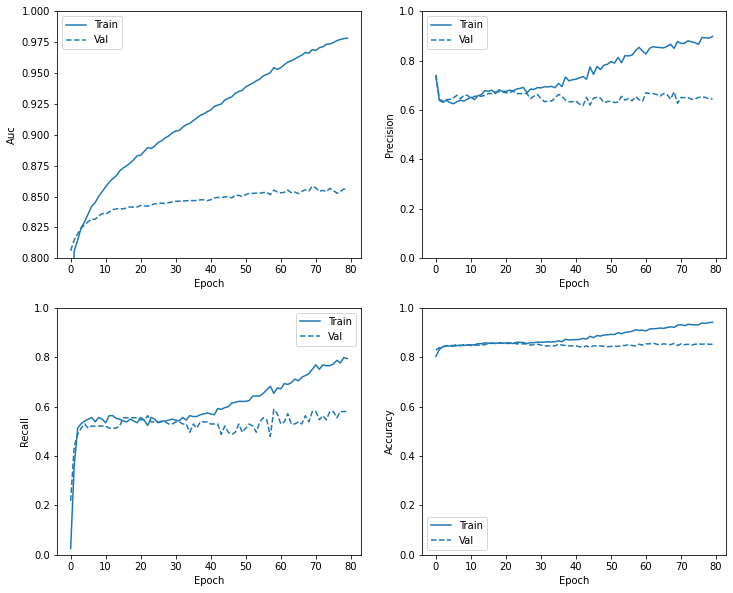

In [17]:
plot_metrics(history)

In [18]:
predictions = np.argmax(model.predict(X_test,batch_size=1), axis=-1)

In [19]:
predictions

array([2, 2, 0, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 4, 1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
baseline_results = model.evaluate(X_test,y_te,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

loss :  1.1474155187606812
tp :  69.0
fp :  41.0
tn :  435.0
fn :  50.0
accuracy :  0.8470584750175476
precision :  0.6272727251052856
recall :  0.5798319578170776
auc :  0.8584051728248596



In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix
[[ 2  0 11  0  0]
 [ 0  1 18  0  0]
 [ 3  4 67  0  0]
 [ 0  0  3  0  0]
 [ 0  0  6  0  4]]


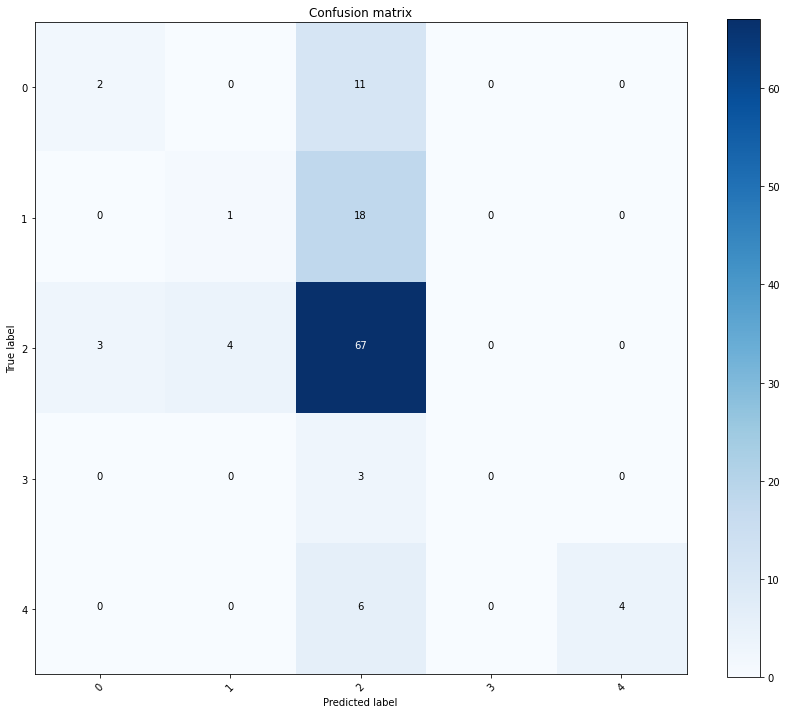

In [22]:
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2','3','4'],
                      title='Confusion matrix')

In [23]:
from sklearn.metrics import classification_report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.40      0.15      0.22        13
           1       0.20      0.05      0.08        19
           2       0.64      0.91      0.75        74
           3       0.00      0.00      0.00         3
           4       1.00      0.40      0.57        10

    accuracy                           0.62       119
   macro avg       0.45      0.30      0.33       119
weighted avg       0.56      0.62      0.55       119



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
seed =45
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=seed)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    ytr = pd.get_dummies(ytr)
    yval = pd.get_dummies(yvl)
    #model
    model.fit(xtr,ytr, batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks = [early_stopping],validation_data=(xvl,yval))
    score = accuracy_score(yvl,np.argmax(model.predict(xvl,batch_size=1), axis=-1))
    print('accuracy_score:',score)
    cv_score.append(score)    
    i+=1
print('Average_Accuracy')
print(sum(cv_score)/5)

1 of KFold 5
Epoch 1/100
316/316 [==============================] - 1s 4ms/step - loss: 1.4766 - tp: 160.0000 - fp: 117.0000 - tn: 1147.0000 - fn: 156.0000 - accuracy: 0.8272 - precision: 0.5776 - recall: 0.5063 - auc: 0.8139 - val_loss: 1.0909 - val_tp: 48.0000 - val_fp: 28.0000 - val_tn: 292.0000 - val_fn: 32.0000 - val_accuracy: 0.8500 - val_precision: 0.6316 - val_recall: 0.6000 - val_auc: 0.8735
Epoch 2/100
316/316 [==============================] - 1s 2ms/step - loss: 1.0526 - tp: 158.0000 - fp: 98.0000 - tn: 1166.0000 - fn: 158.0000 - accuracy: 0.8380 - precision: 0.6172 - recall: 0.5000 - auc: 0.8642 - val_loss: 1.0704 - val_tp: 46.0000 - val_fp: 28.0000 - val_tn: 292.0000 - val_fn: 34.0000 - val_accuracy: 0.8450 - val_precision: 0.6216 - val_recall: 0.5750 - val_auc: 0.8683
Epoch 3/100
316/316 [==============================] - 1s 2ms/step - loss: 0.9832 - tp: 160.0000 - fp: 98.0000 - tn: 1166.0000 - fn: 156.0000 - accuracy: 0.8392 - precision: 0.6202 - recall: 0.5063 - auc: 0

In [25]:
results = pd.read_csv('/content/drive/My Drive/HAX/summer project/MODELS.csv')

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [27]:
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average='weighted')
precision = precision_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
cross_validation_score = sum(cv_score)/5

tempresults = pd.DataFrame({'Method':['Neural Network classifier'],
                        'accuracy': accuracy,
                       'recall':recall,
                       'precision':precision,
                       'f1_score':f1,
                       'cross_val_score':cross_validation_score},index={'11'})
results = pd.concat([results, tempresults])
results = results[['Method', 'accuracy','recall','precision','f1_score','cross_val_score']]
results

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Method,accuracy,recall,precision,f1_score,cross_val_score
0,Logistic Regression,0.625000,0.625000,0.573573,0.571560,0.643924
1,Gaussian Naive bayes,0.550000,0.550000,0.515269,0.527998,0.563196
2,K Nearest Neighbor,0.637500,0.637500,0.506061,0.522908,0.507532
3,Support Vector Machines,0.650000,0.650000,0.676736,0.572720,0.621203
4,Decision_tree,0.600000,0.600000,0.576863,0.587349,0.563038
5,Random Forest,0.700000,0.700000,0.746832,0.627617,0.648924
6,Gradient Boost,0.687500,0.687500,0.695000,0.681696,0.669082
7,XG Boost,0.687500,0.687500,0.693008,0.674947,0.626329
8,Light GBM,0.687500,0.687500,0.739015,0.674028,0.661677
9,Extratrees Classifier,0.637500,0.637500,0.542905,0.542561,0.654051


In [29]:
results.to_csv('MODELS_COMPLETE.csv',index=True)